<a href="https://colab.research.google.com/github/andysun-1997/CIFAR-10-Recognition/blob/main/CIFAR_10_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.4.0


In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()
print('x_train shape: {}, y_train_.shape: {}'
      .format(x_train.shape, y_train_.shape))
print('x_test shape: {}, y_test_.shape: {}'.format(x_test.shape, y_test_.shape))

x_train shape: (50000, 32, 32, 3), y_train_.shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test_.shape: (10000, 1)


In [ ]:
y_train_ = y_train_.reshape(y_train_.shape[0],)
y_test_ = y_test_.reshape(y_test_.shape[0],)
print('y_train_ shape: {}, y_test_ shape: {}'
      .format(y_train_.shape, y_test_.shape))

y_train_ shape: (50000,), y_test_ shape: (10000,)


In [ ]:
# pick 25 random images and plot
idxs = np.random.randint(x_train.shape[0], size=25)
images = x_train[idxs]
labels = y_train_[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

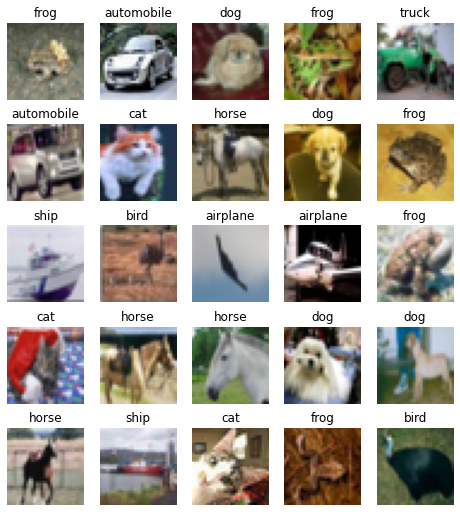

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = labels[i]
  ax.set_title(classnames[idx])
  
plt.show()

In [92]:
from keras.models import Sequential
model = Sequential()

In [93]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [94]:
model.add(Conv2D(filters=64, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))

In [95]:
model.add(MaxPool2D())

In [96]:
model.add(Conv2D(filters=128,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())

In [97]:
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [98]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [99]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               460900    
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [100]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [101]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

In [ ]:
history = model.fit(x_train, y_train, batch_size=50, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
1000/1000 [==============================] - 129s 128ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
1000/1000 [==============================] - 127s 127ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1000/1000 [==============================] - 129s 129ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
 242/1000 [======>.......................] - ETA: 1:31 - loss: 2.3027 - accuracy: 0.1014

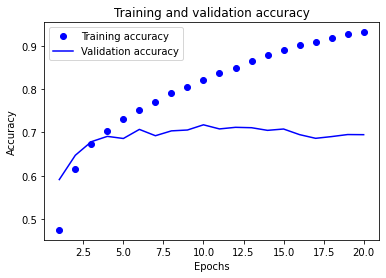

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

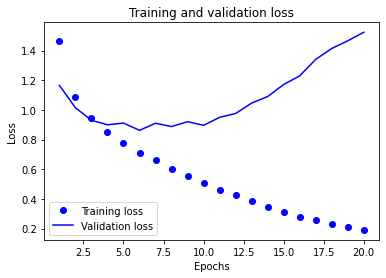

In [80]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 1. Data
I used the CIFAR-10 dataset: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

I chose this dataset because it contains colorful images of common objects. 

![](https://drive.google.com/uc?export=view&id=1JwCc_0kN-fP6PScjGmGM6E_1V-bhe1MO)

### Reference
*   Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

# 2. Network

2 convolution and max pooling layers and 2 dense layers. 

![Model specifications](https://drive.google.com/uc?export=view&id=124I6B1erRqBrm5PC9G9GVGyKxSYaujt6)

The CNN network is similar to the one below with 1 more dense layer.
![](https://miro.medium.com/max/1050/1*LTRcAyl6zuuJvpU-5KECZA.png)

# 3. Training
Batch size is 50. 20 Epochs of training. 
![](https://drive.google.com/uc?export=view&id=1YBoQ_vLWsdj0JSO0apbdkm5VAAwFtrc_)

# 4. Validation

Training accuracy goes to around 93% in 20 epochs. And testing accuracy goes to 70% in around 6 epochs and stays there. A slight indication of overfitting as the training accuracy surpasses 90% and the testing accuracy dips slightly below 70%. 

![](https://drive.google.com/uc?export=view&id=1LBTsO7tq8342uZ0-sd1OdFc1gKbDbaOD)

# 5. Discussion

I used a basic CNN network with 2 convolutional and max pooling layers and 2 dense layers. The 1st convolutional and max pooling layer has 64 kernels, and the 2nd 128. 

I have also tried a narrower network of similar depth, with 32 and 64 kernels in the convolutional and max pooling layers and 1 dense layer. We get lower training accuracy around 78% in 15 epochs but similar testing accuracy of 70%.

I found that widening the network doesn't change the testing accuracy but increases the training accuracy. 